In [ ]:
#Importing all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

In [ ]:
#Loading the dataset into variable dataset and printing it.
dataset = pd.read_csv('/content/covid.csv')
print(dataset)

    Person  Age  CasesArea  Covid
0        1   60       4000      1
1        2   25        750      0
2        3   45       1000      0
3        4   50       5000      1
4        5   90       1000      1
5        6   60       5500      1
6        7   29        500      0
7        8   35       3500      0
8        9   60        600      0
9       10   40       3300      0
10      11   58       3500      1
11      12   25       2500      0
12      13   45       3000      0
13      14   50       1000      0
14      15   60       1000      0
15      16   75       3800      1
16      17   35       1700      0
17      18   52       2700      0
18      19   70       5000      1
19      20   50       1500      0
20      21   25       2000      0
21      22   30       2000      0
22      23   21       2300      0
23      24   44       4000      0
24      25   48       4500      1
25      26   65       5000      1
26      27   53       4000      0
27      28   29       2000      0
28      29   6

In [ ]:
#Extracting the input and output from the dataset into variables x and y.
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 30)

In [ ]:
#Scaling the input data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Defining the model with number of neighbours as 5 and distance metric as minkowski.
#Then training the model on training data.
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the x_test values and storing it in y_pred and displaying it.
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
#Calculating and displaying the accuracy of our model.
accuracy_score(y_test,y_pred)*100

80.0

In [ ]:
#Confusion matrix of the predictions.
confusion_matrix(y_test, y_pred)

array([[4, 0],
       [2, 4]])

In [ ]:
#Classification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<function matplotlib.pyplot.show>

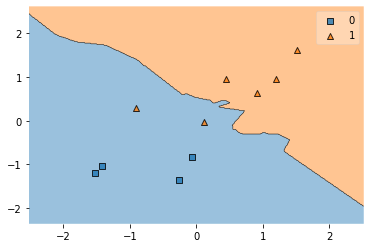

In [ ]:
#Plotting the decision boundary.
plot_decision_regions(x_test,y_test,clf=classifier)
plt.show